In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

#### Load & Understand the Data

In [201]:
# Load the CSV file
df = pd.read_csv("Exploratory_Data_Analysis.csv")

In [202]:
# Show first 5 rows to understand structure
display(df.head())

,category_code,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2012.0,2.0,11300000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,5475,Operating
1,enterprise,operating,2004,15.679245,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,6205,Operating
2,web,operating,2006,15.679245,2007.0,2007.0,1.0,2500000.0,2010.000000,2012.000000,...,False,False,False,False,False,True,False,1,5475,Operating
3,software,operating,1996,15.679245,2011.0,2012.0,2.0,840000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,9125,Operating
4,education,operating,2009,15.679245,2011.0,2011.0,1.0,559522.0,2010.465221,2011.126153,...,True,False,False,False,False,False,False,1,4380,Operating


In [203]:
# Shape of the dataset (rows x columns)
print("Shape of Dataset (Rows, Columns):", df.shape)

Shape of Dataset (Rows, Columns): (7326, 28)


In [204]:
# Information about columns, data types, and missing values
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       7326 non-null   object 
 1   status              7326 non-null   object 
 2   founded_at          7326 non-null   int64  
 3   investment_rounds   7326 non-null   float64
 4   first_funding_at    7326 non-null   float64
 5   last_funding_at     7326 non-null   float64
 6   funding_rounds      7326 non-null   float64
 7   funding_total_usd   7326 non-null   float64
 8   first_milestone_at  7326 non-null   float64
 9   last_milestone_at   7326 non-null   float64
 10  milestones          7326 non-null   float64
 11  relationships       7326 non-null   float64
 12  lat                 7326 non-null   float64
 13  lng                 7326 non-null   float64
 14  country_CAN         7326 non-null   bool   
 15  country_DEU         7326 non-null 

In [205]:
# Basic statistical summary for numerical columns
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7.326000e+03,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.0,7326.000000
mean,2006.623123,15.679245,2010.654404,2011.108725,1.328965,3.414547e+06,2010.465221,2011.126153,1.578409,4.752173,39.061251,-64.435424,1.0,5247.560060
std,7.030586,5.590772,2.386757,2.296891,0.469869,2.871523e+06,2.209811,2.084369,0.572175,14.598979,12.315790,61.311449,0.0,2566.163876
min,1906.000000,1.000000,1987.000000,1987.000000,1.000000,5.120000e+05,1978.000000,1978.000000,1.000000,1.000000,-41.286460,-157.858333,1.0,2920.000000
25%,2005.000000,15.679245,2010.000000,2010.000000,1.000000,1.100004e+06,2010.465221,2011.126153,1.000000,2.000000,36.162664,-118.243685,1.0,3650.000000
50%,2009.000000,15.679245,2011.000000,2012.000000,1.000000,2.296456e+06,2010.465221,2011.126153,1.578409,4.000000,39.295514,-79.904228,1.0,4380.000000
75%,2011.000000,15.679245,2013.000000,2013.000000,2.000000,5.000000e+06,2011.000000,2012.000000,1.578409,5.000000,44.047520,-3.703790,1.0,5840.000000
max,2013.000000,478.000000,2013.000000,2013.000000,2.000000,1.150000e+07,2014.000000,2014.000000,7.000000,982.000000,68.075576,174.811945,1.0,41975.000000


In [206]:
# Missing values per column
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
category_code         0
status                0
founded_at            0
investment_rounds     0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
country_CAN           0
country_DEU           0
country_ESP           0
country_FRA           0
country_GBR           0
country_IND           0
country_IRL           0
country_ISR           0
country_SWE           0
country_USA           0
country_other         0
isClosed              0
active_days           0
Operating_Status      0
dtype: int64


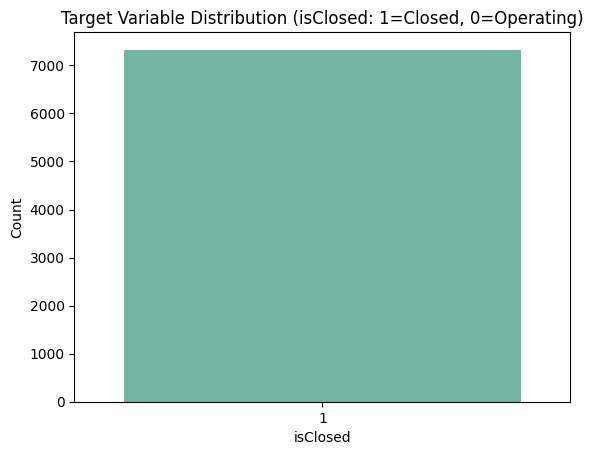

In [207]:
# Target Variable Distribution
sns.countplot(x='isClosed', hue='isClosed', data=df, palette="Set2", legend=False)
plt.title("Target Variable Distribution (isClosed: 1=Closed, 0=Operating)")
plt.xlabel("isClosed")
plt.ylabel("Count")
plt.show()

In [208]:
# Column-wise Unique Values (useful for categorical data)
print("Unique Values per Column:")
print(df.nunique())

Unique Values per Column:
category_code           42
status                   2
founded_at              66
investment_rounds       16
first_funding_at        19
last_funding_at         19
funding_rounds           2
funding_total_usd     2584
first_milestone_at      28
last_milestone_at       28
milestones               8
relationships           50
lat                   1554
lng                   1552
country_CAN              2
country_DEU              2
country_ESP              2
country_FRA              2
country_GBR              2
country_IND              2
country_IRL              2
country_ISR              2
country_SWE              2
country_USA              2
country_other            2
isClosed                 1
active_days             66
Operating_Status         1
dtype: int64


# 1. Understand the Domain and Problem Statement

#### Task: Gain a comprehensive understanding of the problem domain to identify the types of features that may be relevant
#### - Steps:

#### 1.1- Review the Objective: Clearly understand the goal of the analysis or model (e.g., classification, regression).

In [209]:
# Step 1.1 — Review the Objective

project_objective = """
Project Objective:
----------------------
Perform Exploratory Data Analysis (EDA) and Feature Engineering on the dataset.

Goal:
- Understand the dataset in depth.
- Discover hidden patterns, trends, and correlations.
- Clean and prepare the data for predictive modeling.
- Engineer meaningful features to improve model performance.

Type of Task:
- At this stage, we are performing EDA and Feature Engineering.
- Final goal: Classification task (Target variable = isClosed)
"""

print(project_objective)


Project Objective:
----------------------
Perform Exploratory Data Analysis (EDA) and Feature Engineering on the dataset.

Goal:
- Understand the dataset in depth.
- Discover hidden patterns, trends, and correlations.
- Clean and prepare the data for predictive modeling.
- Engineer meaningful features to improve model performance.

Type of Task:
- At this stage, we are performing EDA and Feature Engineering.
- Final goal: Classification task (Target variable = isClosed)



#### 1.2- Domain Knowledge: Use domain knowledge to determine which features might be important or relevant to the problem

In [210]:
print("\nAll Columns in the Dataset:\n")
for idx, col in enumerate(df.columns, 1):
    print(f"{idx}. {col}")


All Columns in the Dataset:

1. category_code
2. status
3. founded_at
4. investment_rounds
5. first_funding_at
6. last_funding_at
7. funding_rounds
8. funding_total_usd
9. first_milestone_at
10. last_milestone_at
11. milestones
12. relationships
13. lat
14. lng
15. country_CAN
16. country_DEU
17. country_ESP
18. country_FRA
19. country_GBR
20. country_IND
21. country_IRL
22. country_ISR
23. country_SWE
24. country_USA
25. country_other
26. isClosed
27. active_days
28. Operating_Status


In [211]:
print("\nDataset Information:\n")
df.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       7326 non-null   object 
 1   status              7326 non-null   object 
 2   founded_at          7326 non-null   int64  
 3   investment_rounds   7326 non-null   float64
 4   first_funding_at    7326 non-null   float64
 5   last_funding_at     7326 non-null   float64
 6   funding_rounds      7326 non-null   float64
 7   funding_total_usd   7326 non-null   float64
 8   first_milestone_at  7326 non-null   float64
 9   last_milestone_at   7326 non-null   float64
 10  milestones          7326 non-null   float64
 11  relationships       7326 non-null   float64
 12  lat                 7326 non-null   float64
 13  lng                 7326 non-null   float64
 14  country_CAN         7326 non-null   bool   
 15  country_DEU         7326 non-nul

In [212]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Columns:")
print(numerical_cols)


Numerical Columns:
['founded_at', 'investment_rounds', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days']


In [213]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols)


Categorical Columns:
['category_code', 'status', 'Operating_Status']


In [214]:
# Sample rows
print("\nDataset Sample (first 5 rows):")
display(df.head())


Dataset Sample (first 5 rows):


,category_code,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2012.0,2.0,11300000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,5475,Operating
1,enterprise,operating,2004,15.679245,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,6205,Operating
2,web,operating,2006,15.679245,2007.0,2007.0,1.0,2500000.0,2010.000000,2012.000000,...,False,False,False,False,False,True,False,1,5475,Operating
3,software,operating,1996,15.679245,2011.0,2012.0,2.0,840000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,9125,Operating
4,education,operating,2009,15.679245,2011.0,2011.0,1.0,559522.0,2010.465221,2011.126153,...,True,False,False,False,False,False,False,1,4380,Operating


#### 1.3 Examine the Data: Understand the existing data types (numerical, categorical, text, dates, etc.) and their roles in the context of the problem

In [215]:
# Dataset shape
print("\nDataset Shape:", df.shape)


Dataset Shape: (7326, 28)


In [216]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
category_code          object
status                 object
founded_at              int64
investment_rounds     float64
first_funding_at      float64
last_funding_at       float64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
country_CAN              bool
country_DEU              bool
country_ESP              bool
country_FRA              bool
country_GBR              bool
country_IND              bool
country_IRL              bool
country_ISR              bool
country_SWE              bool
country_USA              bool
country_other            bool
isClosed                int64
active_days             int64
Operating_Status       object
dtype: object


In [217]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
category_code         0
status                0
founded_at            0
investment_rounds     0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
country_CAN           0
country_DEU           0
country_ESP           0
country_FRA           0
country_GBR           0
country_IND           0
country_IRL           0
country_ISR           0
country_SWE           0
country_USA           0
country_other         0
isClosed              0
active_days           0
Operating_Status      0
dtype: int64


In [218]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(df[numerical_cols].describe())


Summary Statistics for Numerical Columns:


,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7.326000e+03,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.0,7326.000000
mean,2006.623123,15.679245,2010.654404,2011.108725,1.328965,3.414547e+06,2010.465221,2011.126153,1.578409,4.752173,39.061251,-64.435424,1.0,5247.560060
std,7.030586,5.590772,2.386757,2.296891,0.469869,2.871523e+06,2.209811,2.084369,0.572175,14.598979,12.315790,61.311449,0.0,2566.163876
min,1906.000000,1.000000,1987.000000,1987.000000,1.000000,5.120000e+05,1978.000000,1978.000000,1.000000,1.000000,-41.286460,-157.858333,1.0,2920.000000
25%,2005.000000,15.679245,2010.000000,2010.000000,1.000000,1.100004e+06,2010.465221,2011.126153,1.000000,2.000000,36.162664,-118.243685,1.0,3650.000000
50%,2009.000000,15.679245,2011.000000,2012.000000,1.000000,2.296456e+06,2010.465221,2011.126153,1.578409,4.000000,39.295514,-79.904228,1.0,4380.000000
75%,2011.000000,15.679245,2013.000000,2013.000000,2.000000,5.000000e+06,2011.000000,2012.000000,1.578409,5.000000,44.047520,-3.703790,1.0,5840.000000
max,2013.000000,478.000000,2013.000000,2013.000000,2.000000,1.150000e+07,2014.000000,2014.000000,7.000000,982.000000,68.075576,174.811945,1.0,41975.000000


In [219]:
# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
category_code: 42 unique values
status: 2 unique values
Operating_Status: 1 unique values


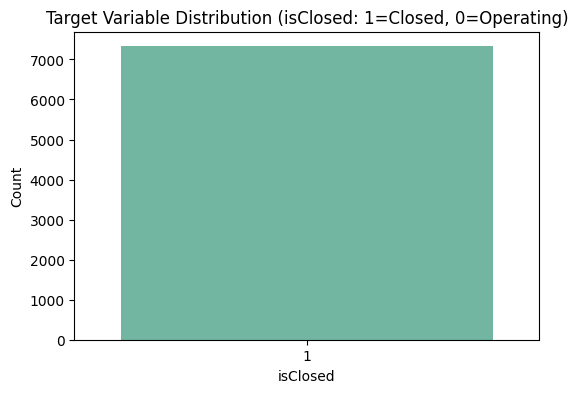

In [220]:
# Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='isClosed', hue='isClosed', data=df, palette="Set2", legend=False)
plt.title("Target Variable Distribution (isClosed: 1=Closed, 0=Operating)")
plt.xlabel("isClosed")
plt.ylabel("Count")
plt.show()

# 2. Feature Selection

#### - Task: Identify the most relevant features for the analysis or modeling task.
#### - Steps:

####  2.1 - Remove Irrelevant Features: Eliminate features that do not have any significant impact on the target variable or are not relevant to the problem

In [221]:
# Drop unnecessary columns in the dataset
irrelevant_cols = ['id', 'serial_number', 'unnecessary_column']  # Replace with your actual irrelevant columns
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns], errors='ignore')

print("Remaining Columns after Removing Irrelevant Features:")
print(df.columns.tolist())

Remaining Columns after Removing Irrelevant Features:
['category_code', 'status', 'founded_at', 'investment_rounds', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'isClosed', 'active_days', 'Operating_Status']


#### 2.2  - Handle Multicollinearity: Use correlation analysis or variance inflation factor (VIF) to remove redundant features

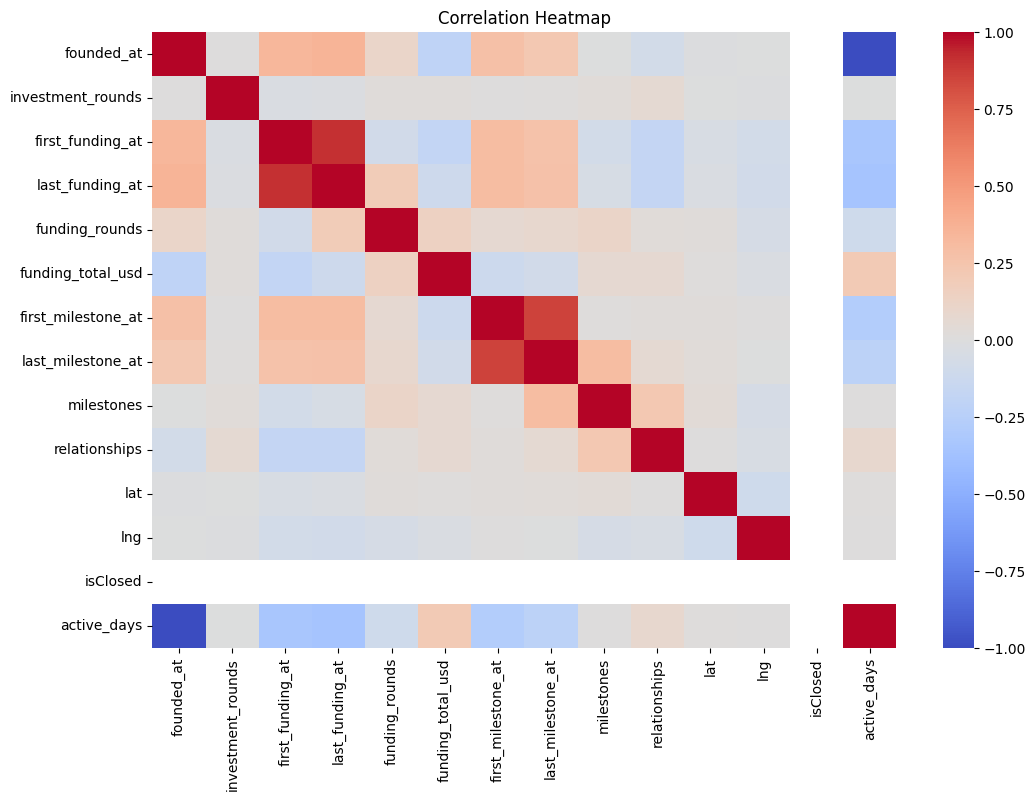

Removed 3 highly correlated features:
{'last_funding_at', 'last_milestone_at', 'active_days'}


In [222]:
#  Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Drop one of the features from highly correlated pairs
threshold = 0.85  # Features above this correlation are considered redundant
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Drop highly correlated features from original dataframe
df = df.drop(columns=high_corr_features, errors="ignore")

print(f"Removed {len(high_corr_features)} highly correlated features:")
print(high_corr_features)

#### 2.3 - Feature Importance Technique: Apply feature importance methods such as mutual information, Random Forest feature importance, or Lasso regularization to select important features

In [223]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2.0,11300000.0,2010.465221,1.578409,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
1,enterprise,operating,2004,15.679245,2011.0,1.0,1500000.0,2010.000000,1.000000,8.000000,...,False,False,False,False,False,False,True,False,1,Operating
2,web,operating,2006,15.679245,2007.0,1.0,2500000.0,2010.000000,2.000000,7.000000,...,False,False,False,False,False,False,True,False,1,Operating
3,software,operating,1996,15.679245,2011.0,2.0,840000.0,2010.465221,1.578409,19.000000,...,False,False,False,False,False,False,True,False,1,Operating
4,education,operating,2009,15.679245,2011.0,1.0,559522.0,2010.465221,1.578409,4.752173,...,False,True,False,False,False,False,False,False,1,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2.0,600000.0,2010.000000,1.000000,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
7322,web,operating,2006,15.679245,2007.0,1.0,10000000.0,2006.000000,1.000000,4.000000,...,False,False,True,False,False,False,False,False,1,Operating
7323,enterprise,operating,2011,15.679245,2011.0,1.0,750000.0,2011.000000,1.000000,3.000000,...,False,False,False,False,False,False,True,False,1,Operating
7324,web,operating,2007,15.679245,2008.0,1.0,798679.0,2008.000000,3.000000,2.000000,...,False,False,False,False,False,False,False,True,1,Operating


In [224]:
# 1. Prepare Data
# ----------------------------
X = df.drop("status", axis=1)   # <- Replace 'status' with your target column
y = df["status"]

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [225]:
# Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({"Feature": X.columns, "MI_Score": mi_scores})
mi_df = mi_df.sort_values(by="MI_Score", ascending=False)

print("Top Features (Mutual Information):\n", mi_df.head(10))

Top Features (Mutual Information):
                 Feature  MI_Score
7         relationships  0.008343
0            founded_at  0.008279
6            milestones  0.004310
1     investment_rounds  0.003897
2      first_funding_at  0.003439
9                   lng  0.002701
8                   lat  0.002560
4     funding_total_usd  0.002361
49  category_code_other  0.002180
14          country_GBR  0.002087


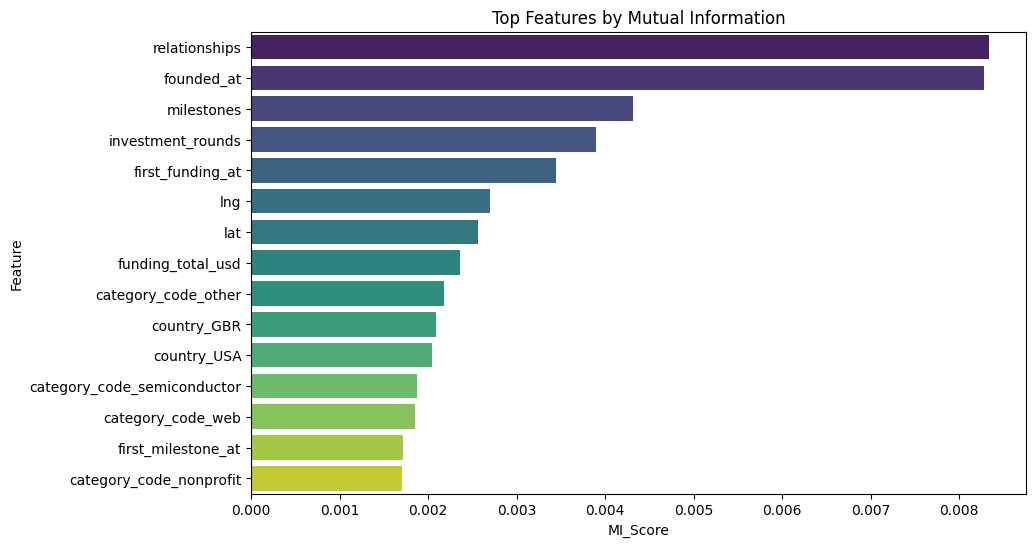

In [226]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="MI_Score",
    y="Feature",
    hue="Feature",      
    data=mi_df.head(15),
    palette="viridis",
    legend=False         
)
plt.title("Top Features by Mutual Information")
plt.show()

In [227]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create dataframe of feature importance
rf_df = pd.DataFrame({
    "Feature": X.columns,
    "RF_Importance": rf.feature_importances_
})
rf_df = rf_df.sort_values(by="RF_Importance", ascending=False)

# Print Top 10 Features
print("Top Features (Random Forest):\n", rf_df.head(10))

Top Features (Random Forest):
               Feature  RF_Importance
0          founded_at       0.145733
7       relationships       0.145142
4   funding_total_usd       0.114945
8                 lat       0.109625
9                 lng       0.104322
2    first_funding_at       0.073211
6          milestones       0.067653
5  first_milestone_at       0.051972
1   investment_rounds       0.035936
3      funding_rounds       0.018789


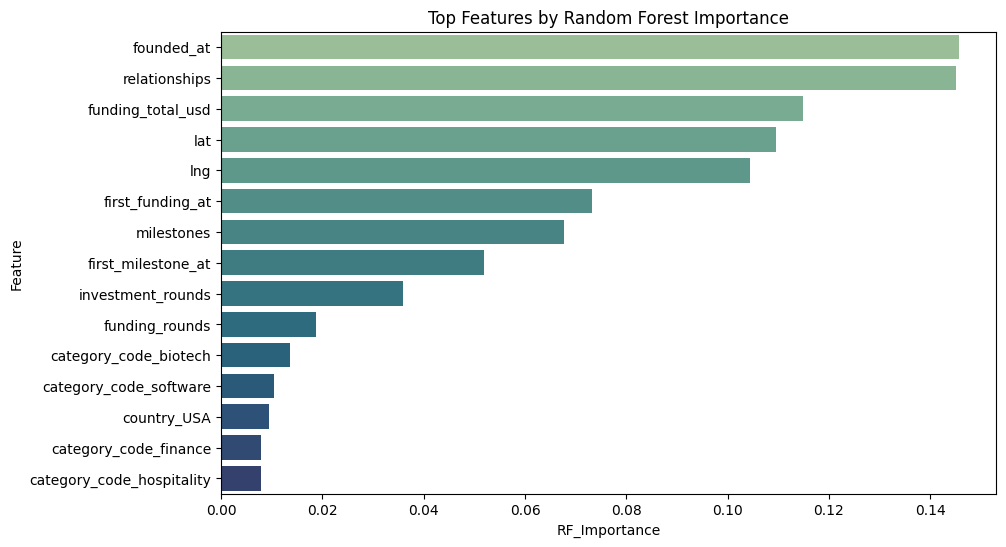

In [228]:
# Plot Top 15 Features
plt.figure(figsize=(10, 6))
sns.barplot(
    x="RF_Importance",
    y="Feature",
    hue="Feature",          # hue = y add for seaborn>=0.14 
    data=rf_df.head(15),
    palette="crest",
    legend=False
)
plt.title("Top Features by Random Forest Importance")
plt.show()

In [229]:
print("Target Column Sample Values:")
print(np.unique(y))
print("Data Type:", type(y))

Target Column Sample Values:
[0 1]
Data Type: <class 'numpy.ndarray'>


In [230]:
# Logistic Regression with L1 penalty (Lasso Regularization)
log_reg = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
log_reg.fit(X, y)

lasso_df = pd.DataFrame({"Feature": X.columns, "Lasso_Coeff": log_reg.coef_[0]})
lasso_df = lasso_df.sort_values(by="Lasso_Coeff", ascending=False)

print("Top Features (Logistic Regression with L1 Regularization):\n", lasso_df.head(10))

Top Features (Logistic Regression with L1 Regularization):
                       Feature  Lasso_Coeff
3              funding_rounds     0.699109
28    category_code_ecommerce     0.620051
62          category_code_web     0.375280
22    category_code_analytics     0.305469
33  category_code_games_video     0.220576
1           investment_rounds     0.103673
29    category_code_education     0.085107
15                country_IND     0.026337
0                  founded_at     0.025952
8                         lat     0.007990


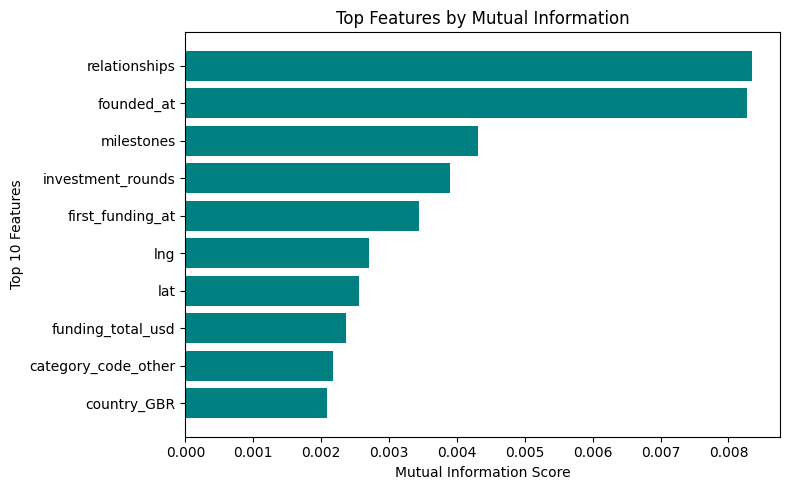

In [231]:
# 5. Visualization (Optional)
plt.figure(figsize=(8, 5))
plt.barh(
    y=mi_df["Feature"].head(10), 
    width=mi_df["MI_Score"].head(10), 
    color="teal"
)
plt.xlabel("Mutual Information Score")
plt.ylabel("Top 10 Features")
plt.title("Top Features by Mutual Information")
plt.gca().invert_yaxis()   # Highest score at top
plt.tight_layout()
plt.show()

#### 2.4 - Domain Expert Input: Collaborate with domain experts to identify features that might have significance based on business context

In [232]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2.0,11300000.0,2010.465221,1.578409,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
1,enterprise,operating,2004,15.679245,2011.0,1.0,1500000.0,2010.000000,1.000000,8.000000,...,False,False,False,False,False,False,True,False,1,Operating
2,web,operating,2006,15.679245,2007.0,1.0,2500000.0,2010.000000,2.000000,7.000000,...,False,False,False,False,False,False,True,False,1,Operating
3,software,operating,1996,15.679245,2011.0,2.0,840000.0,2010.465221,1.578409,19.000000,...,False,False,False,False,False,False,True,False,1,Operating
4,education,operating,2009,15.679245,2011.0,1.0,559522.0,2010.465221,1.578409,4.752173,...,False,True,False,False,False,False,False,False,1,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2.0,600000.0,2010.000000,1.000000,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
7322,web,operating,2006,15.679245,2007.0,1.0,10000000.0,2006.000000,1.000000,4.000000,...,False,False,True,False,False,False,False,False,1,Operating
7323,enterprise,operating,2011,15.679245,2011.0,1.0,750000.0,2011.000000,1.000000,3.000000,...,False,False,False,False,False,False,True,False,1,Operating
7324,web,operating,2007,15.679245,2008.0,1.0,798679.0,2008.000000,3.000000,2.000000,...,False,False,False,False,False,False,False,True,1,Operating


In [233]:
# X, y define
X = df.drop("isClosed", axis=1)
y = df["isClosed"]

In [234]:
# Ensure only numeric columns go into MI calculation
X_num = X.select_dtypes(include=['number'])

mi_scores = mutual_info_classif(X_num, y, random_state=42)

mi_df = pd.DataFrame({"Feature": X_num.columns, "MI_Score": mi_scores})
mi_df = mi_df.sort_values(by="MI_Score", ascending=False)

print("Top Features (Mutual Information):")
print(mi_df.head(10))

Top Features (Mutual Information):
              Feature  MI_Score
1   investment_rounds  0.001502
3      funding_rounds  0.000751
6          milestones  0.000273
5  first_milestone_at  0.000273
2    first_funding_at  0.000137
8                 lat  0.000068
0          founded_at  0.000000
4   funding_total_usd  0.000000
7       relationships  0.000000
9                 lng  0.000000


In [235]:
# Numeric subset
X_num = X.select_dtypes(include=['number'])

# Mutual Information calculate
mi_scores = mutual_info_classif(X_num, y, random_state=42)

# DataFrame create
mi_df = pd.DataFrame({
    "Feature": X_num.columns,
    "Score": mi_scores
})

# Sort descending
mi_df = mi_df.sort_values(by="Score", ascending=False)

print("Top Features by Mutual Information:\n")
print(mi_df.head(10))

Top Features by Mutual Information:

              Feature     Score
1   investment_rounds  0.001502
3      funding_rounds  0.000751
6          milestones  0.000273
5  first_milestone_at  0.000273
2    first_funding_at  0.000137
8                 lat  0.000068
0          founded_at  0.000000
4   funding_total_usd  0.000000
7       relationships  0.000000
9                 lng  0.000000


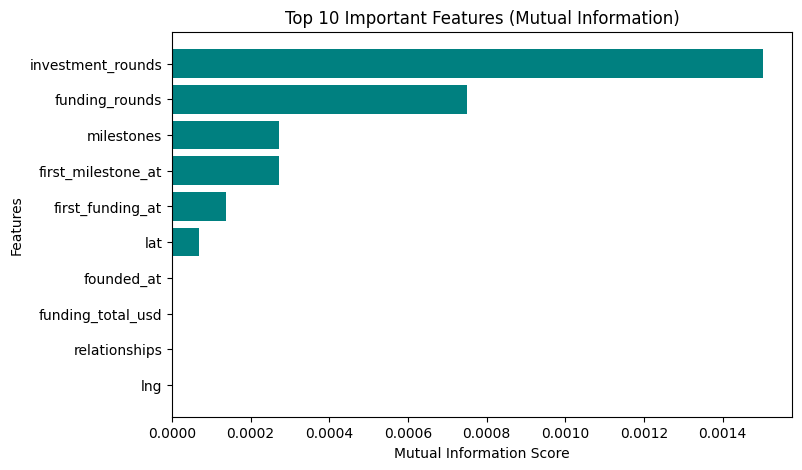

In [236]:
# Top 10 features plot
plt.figure(figsize=(8,5))
plt.barh(mi_df["Feature"].head(10), mi_df["Score"].head(10), color="teal")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features (Mutual Information)")
plt.gca().invert_yaxis()
plt.show()

# 3. Create New Features
#### - Task: Derive new features from the existing data that can enhance model performance.
#### - Steps:

#### 3.1 - Mathematical Transformations: Create new features by applying mathematical operations (e.g., sum, difference, product, ratio) to existing numerical features.

In [237]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2.0,11300000.0,2010.465221,1.578409,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
1,enterprise,operating,2004,15.679245,2011.0,1.0,1500000.0,2010.000000,1.000000,8.000000,...,False,False,False,False,False,False,True,False,1,Operating
2,web,operating,2006,15.679245,2007.0,1.0,2500000.0,2010.000000,2.000000,7.000000,...,False,False,False,False,False,False,True,False,1,Operating
3,software,operating,1996,15.679245,2011.0,2.0,840000.0,2010.465221,1.578409,19.000000,...,False,False,False,False,False,False,True,False,1,Operating
4,education,operating,2009,15.679245,2011.0,1.0,559522.0,2010.465221,1.578409,4.752173,...,False,True,False,False,False,False,False,False,1,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2.0,600000.0,2010.000000,1.000000,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
7322,web,operating,2006,15.679245,2007.0,1.0,10000000.0,2006.000000,1.000000,4.000000,...,False,False,True,False,False,False,False,False,1,Operating
7323,enterprise,operating,2011,15.679245,2011.0,1.0,750000.0,2011.000000,1.000000,3.000000,...,False,False,False,False,False,False,True,False,1,Operating
7324,web,operating,2007,15.679245,2008.0,1.0,798679.0,2008.000000,3.000000,2.000000,...,False,False,False,False,False,False,False,True,1,Operating


In [238]:
#  Numerical Columns Identify 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Total Numeric Columns:", len(numeric_cols))
print("Numeric Columns:")
for col in numeric_cols:
    print("-", col)

Total Numeric Columns: 11
Numeric Columns:
- founded_at
- investment_rounds
- first_funding_at
- funding_rounds
- funding_total_usd
- first_milestone_at
- milestones
- relationships
- lat
- lng
- isClosed


In [239]:
#  Mathematical Feature Engineering (Simple & Useful)
# Total Funding Activity (Sum of key funding metrics)
df["total_funding_activity"] = (
    df["funding_total_usd"].fillna(0) +
    df["funding_rounds"].fillna(0) +
    df["investment_rounds"].fillna(0)
)

df["rounds_difference"] = (
    df["funding_rounds"].fillna(0) - df["investment_rounds"].fillna(0)
)

# Funding per milestone (avoid divide by zero)
df["funding_per_milestone"] = df["funding_total_usd"].fillna(0) / (df["milestones"].fillna(0) + 1)

# Funding per relationship (avoid divide by zero)
df["funding_per_relationship"] = df["funding_total_usd"].fillna(0) / (df["relationships"].fillna(0) + 1)

# Verify new features
print("Shape after feature creation:", df.shape)
print(
    df[
        ["total_funding_activity", "rounds_difference",
         "funding_per_milestone", "funding_per_relationship"]
    ].head()
)

Shape after feature creation: (7326, 29)
   total_funding_activity  rounds_difference  funding_per_milestone  \
0            1.130002e+07         -13.679245           4.382547e+06   
1            1.500017e+06         -14.679245           7.500000e+05   
2            2.500017e+06         -14.679245           8.333333e+05   
3            8.400177e+05         -13.679245           3.257822e+05   
4            5.595387e+05         -14.679245           2.170028e+05   

   funding_per_relationship  
0              3.766667e+06  
1              1.666667e+05  
2              3.125000e+05  
3              4.200000e+04  
4              9.727141e+04  


#### 3.2. - Aggregations: Aggregate data to a different granularity level (e.g., mean, sum, count) based on specific groupings (e.g., time periods, categories).

In [240]:
# Step 1: Check dataset info
print("Columns:", df.columns.tolist())
print(df.head())

Columns: ['category_code', 'status', 'founded_at', 'investment_rounds', 'first_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'isClosed', 'Operating_Status', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship']
  category_code     status  founded_at  investment_rounds  first_funding_at  \
0       medical  operating        2006          15.679245            2011.0   
1    enterprise  operating        2004          15.679245            2011.0   
2           web  operating        2006          15.679245            2007.0   
3      software  operating        1996          15.679245            2011.0   
4     education  operating        2009          15.679245            2011.0   

   funding_rounds  funding_t

In [241]:
# Step 2: Aggregations based on categories (Example: 'category_code')
if "category_code" in df.columns:
    category_agg = df.groupby("category_code").agg({
        "funding_total_usd": ["mean", "sum", "count"],
        "funding_rounds": "mean",
        "investment_rounds": "mean"
    }).reset_index()

    category_agg.columns = ["category_code", "avg_funding", "total_funding", "company_count", 
                            "avg_funding_rounds", "avg_investment_rounds"]

    print("Aggregation based on category_code:")
    print(category_agg.head())

Aggregation based on category_code:
  category_code   avg_funding  total_funding  company_count  \
0   advertising  3.401997e+06   1.024001e+09            301   
1     analytics  3.565707e+06   7.381014e+08            207   
2    automotive  3.822321e+06   7.262411e+07             19   
3       biotech  3.651635e+06   2.800804e+09            767   
4     cleantech  4.479972e+06   8.063950e+08            180   

   avg_funding_rounds  avg_investment_rounds  
0            1.411960              15.630477  
1            1.478261              15.608331  
2            1.473684              15.679245  
3            1.324641              15.647487  
4            1.288889              15.467925  


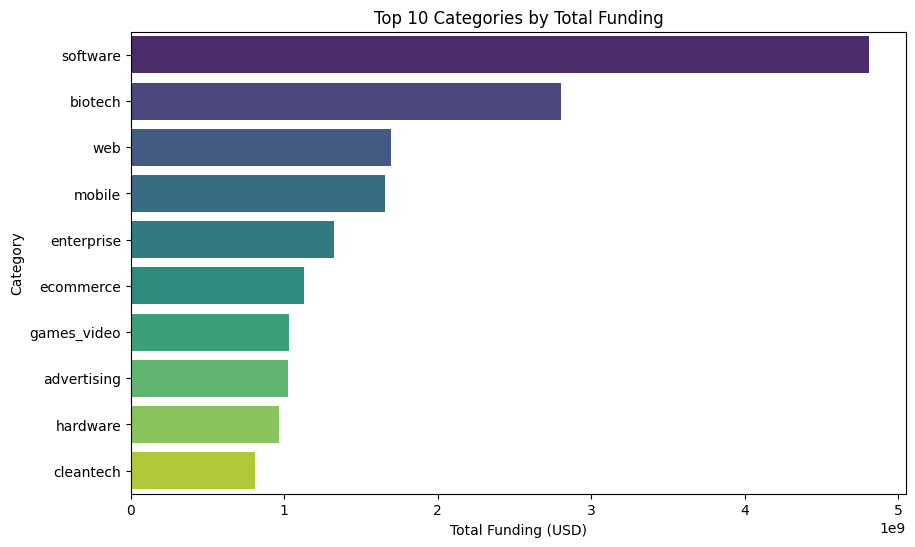

In [242]:
# Visualization: Top 10 categories by total funding
top10 = category_agg.sort_values(by="total_funding", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x="total_funding",
    y="category_code",
    hue="category_code",   # <- fix for seaborn v0.14+
    data=top10,
    palette="viridis",
    legend=False           # <- legend disable
)
plt.title("Top 10 Categories by Total Funding")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Category")
plt.show()

In [243]:
# Step 3: Aggregations based on founded year (Example: 'founded_at')
if "founded_at" in df.columns:
    # founded_at convert to year
    df["founded_year"] = pd.to_datetime(df["founded_at"], errors="coerce").dt.year
    
    # drop rows where founded_year is NaN
    df = df.dropna(subset=["founded_year"])
    
    # groupby aggregation
    year_agg = df.groupby("founded_year").agg({
        "funding_total_usd": ["mean", "sum", "count"],
        "funding_rounds": "mean",
        "investment_rounds": "mean"
    }).reset_index()

    # Rename columns for clarity
    year_agg.columns = [
        "founded_year",
        "avg_funding",
        "total_funding",
        "company_count",
        "avg_funding_rounds",
        "avg_investment_rounds"
    ]

    print(" Aggregation based on founded_year:")
    print(year_agg.head())

 Aggregation based on founded_year:
   founded_year   avg_funding  total_funding  company_count  \
0          1970  3.414547e+06   2.501497e+10           7326   

   avg_funding_rounds  avg_investment_rounds  
0            1.328965              15.679245  


#### 3.3- Date and Time Features: Extract meaningful information from date and time fields (e.g., day of the week, hour of the day, month, quarter).

In [244]:
# Step 1: Check if 'founded_at' column exists
if "founded_at" in df.columns:
    df["founded_at"] = pd.to_datetime(df["founded_at"], errors="coerce")
    # Extract Date & Time Features
    df["founded_year"] = df["founded_at"].dt.year
    df["founded_month"] = df["founded_at"].dt.month
    df["founded_day"] = df["founded_at"].dt.day
    df["founded_dayofweek"] = df["founded_at"].dt.dayofweek      # 0=Monday, 6=Sunday
    df["founded_weekday_name"] = df["founded_at"].dt.day_name()  # Monday, Tuesday, etc.
    df["founded_quarter"] = df["founded_at"].dt.quarter
# Step 2: Print Sample Output
    print(" New Date & Time Features Added:")
    print(df[[
        "founded_at",
        "founded_year",
        "founded_month",
        "founded_day",
        "founded_dayofweek",
        "founded_weekday_name",
        "founded_quarter"
    ]].head())

else:
    print(" 'founded_at' column not found in dataset!")

 New Date & Time Features Added:
                     founded_at  founded_year  founded_month  founded_day  \
0 1970-01-01 00:00:00.000002006          1970              1            1   
1 1970-01-01 00:00:00.000002004          1970              1            1   
2 1970-01-01 00:00:00.000002006          1970              1            1   
3 1970-01-01 00:00:00.000001996          1970              1            1   
4 1970-01-01 00:00:00.000002009          1970              1            1   

   founded_dayofweek founded_weekday_name  founded_quarter  
0                  3             Thursday                1  
1                  3             Thursday                1  
2                  3             Thursday                1  
3                  3             Thursday                1  
4                  3             Thursday                1  


#### 3.4 - Domain-Specific Features: Use domain knowledge to engineer features that capture underlying patterns (e.g., customer lifetime value in retail).

In [245]:
# ── Convert date columns safely to datetime
for c in ["founded_at", "first_funding_at", "last_funding_at"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

In [246]:
# 1. Company age (years)
if "founded_at" in df.columns:
    df["company_age"] = (pd.Timestamp.today() - df["founded_at"]).dt.days // 365
else:
    df["company_age"] = pd.NA

# 2. Funding duration (days) = last_funding_at - first_funding_at
if {"first_funding_at", "last_funding_at"}.issubset(df.columns):
    df["funding_duration_days"] = (df["last_funding_at"] - df["first_funding_at"]).dt.days
else:
    df["funding_duration_days"] = pd.NA

# 3. Avg funding per round = funding_total_usd / (funding_rounds + 1)
if {"funding_total_usd", "funding_rounds"}.issubset(df.columns):
    df["avg_funding_per_round"] = df["funding_total_usd"] / (df["funding_rounds"] + 1)
else:
    df["avg_funding_per_round"] = pd.NA

# 4. High value flag (> $1M)
if "funding_total_usd" in df.columns:
    df["is_high_value_company"] = (df["funding_total_usd"].fillna(0) > 1_000_000).astype(int)
else:
    df["is_high_value_company"] = pd.NA

# 5. Relationships level (Low/Medium/High/Very High)
if "relationships" in df.columns:
    df["relationships_level"] = pd.cut(
        df["relationships"],
        bins=[-1, 5, 15, 50, 200],
        labels=["Low", "Medium", "High", "Very High"]
    )
else:
    df["relationships_level"] = pd.NA

# ── Preview New Features ──
new_features = [
    "company_age", "funding_duration_days", 
    "avg_funding_per_round", "is_high_value_company", 
    "relationships_level"
]

print("\nPreview of Engineered Features:")
print(df[new_features].head())

# ── Check if all source columns exist ──
required_cols = ["founded_at", "first_funding_at", "last_funding_at",
                 "funding_total_usd", "funding_rounds", "relationships"]

missing = [c for c in required_cols if c not in df.columns]
print("\nMissing source columns:", missing if missing else "None ")


Preview of Engineered Features:
   company_age funding_duration_days  avg_funding_per_round  \
0           55                  <NA>           3.766667e+06   
1           55                  <NA>           7.500000e+05   
2           55                  <NA>           1.250000e+06   
3           55                  <NA>           2.800000e+05   
4           55                  <NA>           2.797610e+05   

   is_high_value_company relationships_level  
0                      1                 Low  
1                      1              Medium  
2                      1              Medium  
3                      0                High  
4                      0                 Low  

Missing source columns: ['last_funding_at']


# 4. Feature Transformation
#### - Task: Transform features to improve their representation for modeling.
#### - Steps:

#### 4.1  - Normalization: Scale features to a specific range (e.g., 0-1) using Min-Max scaling to ensure all features have equal importance.

In [247]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,founded_month,founded_day,founded_dayofweek,founded_weekday_name,founded_quarter,company_age,funding_duration_days,avg_funding_per_round,is_high_value_company,relationships_level
0,medical,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002011,2.0,11300000.0,2010.465221,1.578409,2.000000,...,1,1,3,Thursday,1,55,<NA>,3.766667e+06,1,Low
1,enterprise,operating,1970-01-01 00:00:00.000002004,15.679245,1970-01-01 00:00:00.000002011,1.0,1500000.0,2010.000000,1.000000,8.000000,...,1,1,3,Thursday,1,55,<NA>,7.500000e+05,1,Medium
2,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,2500000.0,2010.000000,2.000000,7.000000,...,1,1,3,Thursday,1,55,<NA>,1.250000e+06,1,Medium
3,software,operating,1970-01-01 00:00:00.000001996,15.679245,1970-01-01 00:00:00.000002011,2.0,840000.0,2010.465221,1.578409,19.000000,...,1,1,3,Thursday,1,55,<NA>,2.800000e+05,0,High
4,education,operating,1970-01-01 00:00:00.000002009,15.679245,1970-01-01 00:00:00.000002011,1.0,559522.0,2010.465221,1.578409,4.752173,...,1,1,3,Thursday,1,55,<NA>,2.797610e+05,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,1970-01-01 00:00:00.000002008,15.679245,1970-01-01 00:00:00.000002008,2.0,600000.0,2010.000000,1.000000,2.000000,...,1,1,3,Thursday,1,55,<NA>,2.000000e+05,0,Low
7322,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,10000000.0,2006.000000,1.000000,4.000000,...,1,1,3,Thursday,1,55,<NA>,5.000000e+06,1,Low
7323,enterprise,operating,1970-01-01 00:00:00.000002011,15.679245,1970-01-01 00:00:00.000002011,1.0,750000.0,2011.000000,1.000000,3.000000,...,1,1,3,Thursday,1,55,<NA>,3.750000e+05,0,Low
7324,web,operating,1970-01-01 00:00:00.000002007,15.679245,1970-01-01 00:00:00.000002008,1.0,798679.0,2008.000000,3.000000,2.000000,...,1,1,3,Thursday,1,55,<NA>,3.993395e+05,0,Low


In [248]:
# Min-Max Normalization 
# column for normalize 
df["funding_total_usd_normalized"] = (
    (df["funding_total_usd"] - df["funding_total_usd"].min()) /
    (df["funding_total_usd"].max() - df["funding_total_usd"].min())
)

print(df[["funding_total_usd", "funding_total_usd_normalized"]].head())

   funding_total_usd  funding_total_usd_normalized
0         11300000.0                      0.981798
1          1500000.0                      0.089916
2          2500000.0                      0.180925
3           840000.0                      0.029851
4           559522.0                      0.004325


#### 4.2 - Standardization: Transform features to have a mean of 0 and a standard deviation of 1, which is useful for algorithms that assume normally distributed data.

In [249]:
# Single column standardization
df["funding_total_usd_standardized"] = (
    (df["funding_total_usd"] - df["funding_total_usd"].mean()) /
    df["funding_total_usd"].std()
)

# Result check
print(df[["funding_total_usd", "funding_total_usd_standardized"]].head())

   funding_total_usd  funding_total_usd_standardized
0         11300000.0                        2.746087
1          1500000.0                       -0.666736
2          2500000.0                       -0.318489
3           840000.0                       -0.896579
4           559522.0                       -0.994255


#### 4.3 - Log Transformation: Apply log transformations to reduce skewness and handle outliers in features.

In [250]:
# column log transformation
df["funding_total_usd_log"] = np.log1p(df["funding_total_usd"])
print(df[["funding_total_usd", "funding_total_usd_log"]].head())

   funding_total_usd  funding_total_usd_log
0         11300000.0              16.240313
1          1500000.0              14.220976
2          2500000.0              14.731802
3           840000.0              13.641158
4           559522.0              13.234840


#### 4.4  - Polynomial Features: Generate polynomial and interaction features to capture non-linear relationships between variables.

In [251]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['funding_total_usd']])

# New columns name
poly_columns = poly.get_feature_names_out(['funding_total_usd'])

# polynomial features to DataFrame
df_poly = pd.DataFrame(poly_features, columns=poly_columns)

# merge to Original df
df = pd.concat([df, df_poly], axis=1)

print(df.head())

  category_code     status                    founded_at  investment_rounds  \
0       medical  operating 1970-01-01 00:00:00.000002006          15.679245   
1    enterprise  operating 1970-01-01 00:00:00.000002004          15.679245   
2           web  operating 1970-01-01 00:00:00.000002006          15.679245   
3      software  operating 1970-01-01 00:00:00.000001996          15.679245   
4     education  operating 1970-01-01 00:00:00.000002009          15.679245   

               first_funding_at  funding_rounds  funding_total_usd  \
0 1970-01-01 00:00:00.000002011             2.0         11300000.0   
1 1970-01-01 00:00:00.000002011             1.0          1500000.0   
2 1970-01-01 00:00:00.000002007             1.0          2500000.0   
3 1970-01-01 00:00:00.000002011             2.0           840000.0   
4 1970-01-01 00:00:00.000002011             1.0           559522.0   

   first_milestone_at  milestones  relationships  ...  funding_duration_days  \
0         2010.465221   

#### 4.5 - Quantile Transformation: Use quantile-based scaling to transform features to follow a desired distribution.

In [252]:
# NaN values handle 
df['funding_total_usd'] = df['funding_total_usd'].fillna(0)

# QuantileTransformer object create 
qt = QuantileTransformer(output_distribution='uniform', random_state=0)

# Transformation apply from Series to convert 
df['funding_total_usd_qt'] = pd.Series(
    qt.fit_transform(df[['funding_total_usd']])[:, 0],
    index=df.index
)

# Output check 
print(df[['funding_total_usd', 'funding_total_usd_qt']].head())

   funding_total_usd  funding_total_usd  funding_total_usd_qt
0         11300000.0         11300000.0              0.995895
1          1500000.0          1500000.0              0.350851
2          2500000.0          2500000.0              0.529029
3           840000.0           840000.0              0.137137
4           559522.0           559522.0              0.017399


In [253]:
# Step 1: Duplicate column remove 
df = df.loc[:, ~df.columns.duplicated()]
print("Columns after removing duplicates:")
print(df.columns)

Columns after removing duplicates:
Index(['category_code', 'status', 'founded_at', 'investment_rounds',
       'first_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA',
       'country_GBR', 'country_IND', 'country_IRL', 'country_ISR',
       'country_SWE', 'country_USA', 'country_other', 'isClosed',
       'Operating_Status', 'total_funding_activity', 'rounds_difference',
       'funding_per_milestone', 'funding_per_relationship', 'founded_year',
       'founded_month', 'founded_day', 'founded_dayofweek',
       'founded_weekday_name', 'founded_quarter', 'company_age',
       'funding_duration_days', 'avg_funding_per_round',
       'is_high_value_company', 'relationships_level',
       'funding_total_usd_normalized', 'funding_total_usd_standardized',
       'funding_total_usd_log', '1', 'funding_total_usd^2',
       'funding_total_usd_qt'],
    

# 5. Feature Scaling
#### - Task: Scale features to bring them into a comparable range for model training.
#### - Steps:

#### 5.1- Min-Max Scaling: Rescale features to a range of [0, 1] or [-1, 1], which is effective for models sensitive to the scale of input features

In [254]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,funding_duration_days,avg_funding_per_round,is_high_value_company,relationships_level,funding_total_usd_normalized,funding_total_usd_standardized,funding_total_usd_log,1,funding_total_usd^2,funding_total_usd_qt
0,medical,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002011,2.0,11300000.0,2010.465221,1.578409,2.000000,...,<NA>,3.766667e+06,1,Low,0.981798,2.746087,16.240313,1.0,1.276900e+14,0.995895
1,enterprise,operating,1970-01-01 00:00:00.000002004,15.679245,1970-01-01 00:00:00.000002011,1.0,1500000.0,2010.000000,1.000000,8.000000,...,<NA>,7.500000e+05,1,Medium,0.089916,-0.666736,14.220976,1.0,2.250000e+12,0.350851
2,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,2500000.0,2010.000000,2.000000,7.000000,...,<NA>,1.250000e+06,1,Medium,0.180925,-0.318489,14.731802,1.0,6.250000e+12,0.529029
3,software,operating,1970-01-01 00:00:00.000001996,15.679245,1970-01-01 00:00:00.000002011,2.0,840000.0,2010.465221,1.578409,19.000000,...,<NA>,2.800000e+05,0,High,0.029851,-0.896579,13.641158,1.0,7.056000e+11,0.137137
4,education,operating,1970-01-01 00:00:00.000002009,15.679245,1970-01-01 00:00:00.000002011,1.0,559522.0,2010.465221,1.578409,4.752173,...,<NA>,2.797610e+05,0,Low,0.004325,-0.994255,13.234840,1.0,3.130649e+11,0.017399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,1970-01-01 00:00:00.000002008,15.679245,1970-01-01 00:00:00.000002008,2.0,600000.0,2010.000000,1.000000,2.000000,...,<NA>,2.000000e+05,0,Low,0.008009,-0.980158,13.304687,1.0,3.600000e+11,0.035035
7322,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,10000000.0,2006.000000,1.000000,4.000000,...,<NA>,5.000000e+06,1,Low,0.863487,2.293366,16.118096,1.0,1.000000e+14,0.956957
7323,enterprise,operating,1970-01-01 00:00:00.000002011,15.679245,1970-01-01 00:00:00.000002011,1.0,750000.0,2011.000000,1.000000,3.000000,...,<NA>,3.750000e+05,0,Low,0.021660,-0.927921,13.527830,1.0,5.625000e+11,0.099600
7324,web,operating,1970-01-01 00:00:00.000002007,15.679245,1970-01-01 00:00:00.000002008,1.0,798679.0,2008.000000,3.000000,2.000000,...,<NA>,3.993395e+05,0,Low,0.026090,-0.910969,13.590716,1.0,6.378881e+11,0.116837


In [255]:
# 1. Duplicate column names check and remove
dup_mask = df.columns.duplicated()
if dup_mask.any():
    print(" Duplicate column names found. Keeping first occurrence of each.")
    df = df.loc[:, ~dup_mask].copy()

# 2. Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f"Numeric columns to scale: {len(numeric_cols)}")

# 3. Convert to numeric (force errors to NaN)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 4. Replace infinities with NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# 5. Fill NaN values with median (safe imputation)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 6. Min–Max scaling to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df.loc[:, numeric_cols] = scaler.fit_transform(df[numeric_cols].to_numpy())

# 7. Quick sanity check: min/max per column
print(" Scaled! Preview of min/max per numeric column:")
print(df[numeric_cols].agg(['min', 'max']).T.head())

Numeric columns to scale: 27
 Scaled! Preview of min/max per numeric column:
                    min  max
investment_rounds   0.0  1.0
funding_rounds      0.0  1.0
funding_total_usd   0.0  1.0
first_milestone_at  0.0  1.0
milestones          0.0  1.0


#### 5.2  - Z-score Normalization: Apply standard scaling to normalize the data around a mean of 0 and a standard deviation of 1.

In [256]:
# 1. Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f"Total numeric columns: {len(numeric_cols)}")

# 2. Replace infinite values with NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# 3. Fill NaN with column median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 4. Detect constant columns (zero variance)
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
if constant_cols:
    print(f" Skipping constant columns (zero variance): {constant_cols}")
    numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# 5. Convert to float (safe for scaler)
df[numeric_cols] = df[numeric_cols].astype(float)

# 6. Apply Z-score normalization (mean=0, std=1)
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7. Sanity check (mean ≈ 0, std ≈ 1)
print(" Z-score normalization applied successfully!")
print(df[numeric_cols].agg(['mean', 'std']).T.head())

Total numeric columns: 27
 Skipping constant columns (zero variance): ['isClosed', 'founded_year', 'founded_month', 'founded_day', 'founded_dayofweek', 'founded_quarter', 'company_age', '1']
 Z-score normalization applied successfully!
                            mean       std
investment_rounds   4.849459e-18  1.000068
funding_rounds      5.043437e-17  1.000068
funding_total_usd   4.655481e-17  1.000068
first_milestone_at -1.388885e-15  1.000068
milestones         -1.551827e-17  1.000068


#### 5.3- Robust Scaling: Use robust scaling to minimize the influence of outliers by using the median and interquartile range (IQR) for scaling.

In [257]:
# 1. Numeric columns detect
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f" Total numeric columns: {len(numeric_cols)}")

# 2. Infinite values → NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# 3. NaN values fill with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 4. Detect constant columns (skip them)
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
if constant_cols:
    print(f" Skipping constant columns: {constant_cols}")
    numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# 5. Convert numeric columns to float (safe for scaler)
df[numeric_cols] = df[numeric_cols].astype(float)

# 6. Apply Robust Scaling (center = median, scale = IQR)
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7. Quick result check
print(" Robust Scaling applied successfully!")
print(df[numeric_cols].describe().T.head())

 Total numeric columns: 27
 Skipping constant columns: ['isClosed', 'founded_year', 'founded_month', 'founded_day', 'founded_dayofweek', 'founded_quarter', 'company_age', '1']
 Robust Scaling applied successfully!
                     count          mean       std        min       25%  \
investment_rounds   7326.0  4.849459e-18  1.000068  -2.625800  0.000000   
funding_rounds      7326.0  3.289653e-01  0.469869   0.000000  0.000000   
funding_total_usd   7326.0  2.866904e-01  0.736289  -0.457553 -0.306783   
first_milestone_at  7326.0  2.427057e-14  4.132191 -60.707692  0.000000   
milestones          7326.0  2.405332e-16  0.989222  -1.000000 -1.000000   

                             50%       75%        max  
investment_rounds   0.000000e+00  0.000000  82.699191  
funding_rounds      0.000000e+00  1.000000   1.000000  
funding_total_usd   2.043382e-17  0.693217   2.359885  
first_milestone_at  0.000000e+00  1.000000   6.609790  
milestones          0.000000e+00  0.000000   9.373276  

#### 5.4  - Max-Abs Scaling: Scale features by dividing by their maximum absolute value, which is useful for sparse data.

In [258]:
# 1. Numeric columns detect
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f" Total numeric columns: {len(numeric_cols)}")

# 2. Infinite values → NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# 3. Fill NaN with median (safe imputation)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 4. Detect constant columns (skip them)
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
if constant_cols:
    print(f" Skipping constant columns: {constant_cols}")
    numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# 5. Convert columns to float
df[numeric_cols] = df[numeric_cols].astype(float)

# 6. Apply Max-Abs Scaling (values between -1 and 1)
scaler = MaxAbsScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7. Quick check
print(" Max-Abs Scaling applied successfully!")
print(df[numeric_cols].describe().T.head())

 Total numeric columns: 27
 Skipping constant columns: ['isClosed', 'founded_year', 'founded_month', 'founded_day', 'founded_dayofweek', 'founded_quarter', 'company_age', '1']
 Max-Abs Scaling applied successfully!
                     count          mean       std       min       25%  \
investment_rounds   7326.0  3.030912e-20  0.012093 -0.031751  0.000000   
funding_rounds      7326.0  3.289653e-01  0.469869  0.000000  0.000000   
funding_total_usd   7326.0  1.214849e-01  0.312002 -0.193888 -0.129999   
first_milestone_at  7326.0  3.986255e-16  0.068067 -1.000000  0.000000   
milestones          7326.0  2.812686e-17  0.105536 -0.106686 -0.106686   

                             50%       75%       max  
investment_rounds   0.000000e+00  0.000000  1.000000  
funding_rounds      0.000000e+00  1.000000  1.000000  
funding_total_usd   8.660065e-18  0.293750  1.000000  
first_milestone_at  0.000000e+00  0.016472  0.108879  
milestones          0.000000e+00  0.000000  1.000000  


# 6. Feature Reduction
####  - Task: Reduce the dimensionality of features to remove noise and enhance model performance.
####  - Steps:

#### 6.1   - Principal Component Analysis (PCA): Use PCA to reduce the dimensionality of numerical data while preserving as much variance as possible.

In [259]:
# Step 1: Detect numeric columns (int, float, bool)
numerical_cols = df.select_dtypes(include=['number', 'bool']).columns.drop_duplicates()

# Step 2: Create numeric dataset & force conversion
numerical_data = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Fill missing values with mean
numerical_data = numerical_data.fillna(numerical_data.mean())

# Step 4: Remove constant (zero variance) columns
numerical_data = numerical_data.loc[:, numerical_data.var() != 0]

# Step 5: Final check
print(" Final numerical shape:", numerical_data.shape)
print(" Columns used:", list(numerical_data.columns))

 Final numerical shape: (7326, 30)
 Columns used: ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship', 'avg_funding_per_round', 'is_high_value_company', 'funding_total_usd_normalized', 'funding_total_usd_standardized', 'funding_total_usd_log', 'funding_total_usd^2', 'funding_total_usd_qt']


In [260]:
# Step 6: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Step 7: Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95, random_state=42)
pca_result = pca.fit_transform(scaled_data)

# Step 8: Convert PCA result to DataFrame
pca_df = pd.DataFrame(
    pca_result,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
)

# Step 9: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_variance)
print("Total variance explained:", explained_variance.sum())
print("Number of components selected:", len(explained_variance))

Explained variance ratio for each component: [0.31506301 0.08240149 0.06691411 0.05160564 0.04453556 0.03618478
 0.0358542  0.03513307 0.03482578 0.03431653 0.03422859 0.03389879
 0.03373862 0.03333157 0.03060886 0.02811231 0.0259263 ]
Total variance explained: 0.9566792284682215
Number of components selected: 17


#### 6.2- Feature Selection Techniques: Apply statistical tests (e.g., Chi-Square, ANOVA) to select the most relevant features.

In [261]:
# 1. Check Available colume
print("Available columns:", numerical_data.columns.tolist())

Available columns: ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship', 'avg_funding_per_round', 'is_high_value_company', 'funding_total_usd_normalized', 'funding_total_usd_standardized', 'funding_total_usd_log', 'funding_total_usd^2', 'funding_total_usd_qt']


In [262]:
# 2. Define Features (X) and Target (y)
if "is_high_value_company" in numerical_data.columns:
    X = numerical_data.drop("is_high_value_company", axis=1)
    y = numerical_data["is_high_value_company"]

    # 3. Apply ANOVA F-test
    selector = SelectKBest(score_func=f_classif, k=10)
    X_selected = selector.fit_transform(X, y)

    # 4. Selected top features
    selected_features = X.columns[selector.get_support()]
    print("Top 10 Selected Features (ANOVA F-test):", list(selected_features))
else:
    print(" 'is_high_value_company' column not found in numerical_data")

Top 10 Selected Features (ANOVA F-test): ['funding_total_usd', 'total_funding_activity', 'funding_per_milestone', 'funding_per_relationship', 'avg_funding_per_round', 'funding_total_usd_normalized', 'funding_total_usd_standardized', 'funding_total_usd_log', 'funding_total_usd^2', 'funding_total_usd_qt']


#### 6.3   - Embedded Methods: Use embedded feature selection methods like Lasso or Ridge regression to perform feature selection during model training.

In [263]:
# 1. Features (X) and Target (y)
X = numerical_data.drop("is_high_value_company", axis=1)
y = numerical_data["is_high_value_company"]

# 2. Logistic Regression with L1 penalty
lasso_model = LogisticRegression(
    penalty="l1",
    solver="liblinear",  # l1 ke liye best solver
    C=0.1,               # regularization strength (lower = more shrinkage)
    random_state=42
)
lasso_model.fit(X, y)

# 3. Get coefficients
lasso_coeffs = pd.Series(lasso_model.coef_[0], index=X.columns)

# 4. Select features with non-zero coefficients
selected_lasso_features = lasso_coeffs[lasso_coeffs != 0].index.tolist()

# 5. Print results
print(" Selected Features by Lasso:", selected_lasso_features)
print(" Feature Importance (coefficients):")
print(lasso_coeffs.sort_values(ascending=False))

# 6. Count how many features got selected
print(f"\nTotal selected features: {len(selected_lasso_features)} / {X.shape[1]}")

 Selected Features by Lasso: ['funding_rounds', 'funding_total_usd_qt']
 Feature Importance (coefficients):
funding_total_usd_qt              20.152888
funding_rounds                     0.703497
investment_rounds                  0.000000
first_milestone_at                 0.000000
funding_total_usd                  0.000000
relationships                      0.000000
lat                                0.000000
lng                                0.000000
country_CAN                        0.000000
country_DEU                        0.000000
country_ESP                        0.000000
country_FRA                        0.000000
milestones                         0.000000
country_GBR                        0.000000
country_IND                        0.000000
country_ISR                        0.000000
country_IRL                        0.000000
country_USA                        0.000000
country_other                      0.000000
total_funding_activity             0.000000
country_SWE 

#### 6.4 - Recursive Feature Elimination (RFE): Use recursive feature elimination techniques to remove the least important features iteratively.

In [264]:
# 1. Features (X) and Target (y)
X = numerical_data.drop("is_high_value_company", axis=1)
y = numerical_data["is_high_value_company"]

# 2. Logistic Regression model
model = LogisticRegression(solver="liblinear", random_state=42)

# 3. Recursive Feature Elimination (RFE) → Select Top 10
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# 4. Get selected features
rfe_features = X.columns[rfe.support_].tolist()
print(" Top 10 Selected Features by RFE:", rfe_features)

 Top 10 Selected Features by RFE: ['funding_rounds', 'funding_total_usd', 'country_FRA', 'country_IRL', 'total_funding_activity', 'avg_funding_per_round', 'funding_total_usd_normalized', 'funding_total_usd_standardized', 'funding_total_usd_log', 'funding_total_usd_qt']


In [265]:
# 5. Feature ranking (1 = selected, higher = less important)
feature_ranking = pd.DataFrame({
    "Feature": X.columns,
    "Selected": rfe.support_,
    "Ranking": rfe.ranking_
}).sort_values("Ranking")

print(" Feature Ranking by RFE:")
print(feature_ranking)

 Feature Ranking by RFE:
                           Feature  Selected  Ranking
1                   funding_rounds      True        1
2                funding_total_usd      True        1
14                     country_IRL      True        1
11                     country_FRA      True        1
24    funding_total_usd_normalized      True        1
25  funding_total_usd_standardized      True        1
23           avg_funding_per_round      True        1
19          total_funding_activity      True        1
26           funding_total_usd_log      True        1
28            funding_total_usd_qt      True        1
16                     country_SWE     False        2
10                     country_ESP     False        3
9                      country_DEU     False        4
12                     country_GBR     False        5
17                     country_USA     False        6
8                      country_CAN     False        7
18                   country_other     False        8
7  

In [266]:
# Drop some columns in list
drop_cols = [
    "funding_duration_days",
    "company_age",
    "founded_quarter",
    "founded_dayofweek",
    "founded_day",
    "founded_month"
]

# if those columns show in dataframe then drop them
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors="ignore")

print("Remaining columns after drop:", df.shape[1])
print("Columns kept:\n", df.columns.tolist())

Remaining columns after drop: 40
Columns kept:
 ['category_code', 'status', 'founded_at', 'investment_rounds', 'first_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'isClosed', 'Operating_Status', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship', 'founded_year', 'founded_weekday_name', 'avg_funding_per_round', 'is_high_value_company', 'relationships_level', 'funding_total_usd_normalized', 'funding_total_usd_standardized', 'funding_total_usd_log', '1', 'funding_total_usd^2', 'funding_total_usd_qt']


In [268]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   category_code                   7326 non-null   object        
 1   status                          7326 non-null   object        
 2   founded_at                      7326 non-null   datetime64[ns]
 3   investment_rounds               7326 non-null   float64       
 4   first_funding_at                7326 non-null   datetime64[ns]
 5   funding_rounds                  7326 non-null   float64       
 6   funding_total_usd               7326 non-null   float64       
 7   first_milestone_at              7326 non-null   float64       
 8   milestones                      7326 non-null   float64       
 9   relationships                   7326 non-null   float64       
 10  lat                             7326 non-null   flo

In [269]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,founded_weekday_name,avg_funding_per_round,is_high_value_company,relationships_level,funding_total_usd_normalized,funding_total_usd_standardized,funding_total_usd_log,1,funding_total_usd^2,funding_total_usd_qt
0,medical,operating,1970-01-01 00:00:00.000002006,0.0,1970-01-01 00:00:00.000002011,1.0,0.978269,0.000000,0.000000,-0.002045,...,Thursday,0.582456,0.0,Low,0.978269,0.978269,0.989110,0.0,0.964088,0.991050
1,enterprise,operating,1970-01-01 00:00:00.000002004,0.0,1970-01-01 00:00:00.000002011,0.0,-0.086538,-0.014330,-0.106686,0.004090,...,Thursday,-0.052632,0.0,Medium,-0.086538,-0.086538,-0.264374,0.0,-0.023813,-0.298559
2,web,operating,1970-01-01 00:00:00.000002006,0.0,1970-01-01 00:00:00.000002007,0.0,0.022116,-0.014330,0.077761,0.003067,...,Thursday,0.052632,0.0,Medium,0.022116,0.022116,0.052716,0.0,0.007689,0.057665
3,software,operating,1970-01-01 00:00:00.000001996,0.0,1970-01-01 00:00:00.000002011,1.0,-0.158249,0.000000,0.000000,0.015337,...,Thursday,-0.151579,-1.0,High,-0.158249,-0.158249,-0.624291,0.0,-0.035976,-0.725828
4,education,operating,1970-01-01 00:00:00.000002009,0.0,1970-01-01 00:00:00.000002011,0.0,-0.188724,0.000000,0.000000,0.000769,...,Thursday,-0.151629,-1.0,Low,-0.188724,-0.188724,-0.876509,0.0,-0.039067,-0.965216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,1970-01-01 00:00:00.000002008,0.0,1970-01-01 00:00:00.000002008,1.0,-0.184326,-0.014330,-0.106686,-0.002045,...,Thursday,-0.168421,-1.0,Low,-0.184326,-0.184326,-0.833152,0.0,-0.038698,-0.929956
7322,web,operating,1970-01-01 00:00:00.000002006,0.0,1970-01-01 00:00:00.000002007,0.0,0.837019,-0.137539,-0.106686,0.000000,...,Thursday,0.842105,0.0,Low,0.837019,0.837019,0.913244,0.0,0.746016,0.913203
7323,enterprise,operating,1970-01-01 00:00:00.000002011,0.0,1970-01-01 00:00:00.000002011,0.0,-0.168028,0.016472,-0.106686,-0.001022,...,Thursday,-0.131579,-1.0,Low,-0.168028,-0.168028,-0.694638,0.0,-0.037103,-0.800875
7324,web,operating,1970-01-01 00:00:00.000002007,0.0,1970-01-01 00:00:00.000002008,0.0,-0.162739,-0.075934,0.262209,-0.002045,...,Thursday,-0.126455,-1.0,Low,-0.162739,-0.162739,-0.655603,0.0,-0.036509,-0.766413


In [270]:
#Finally Save cleaned Data
# Save the cleaned data to a new CSV file 
df.to_csv("Feature_Engineering_process.csv", index=False)

# Conclusion & Insights :-

# Conclusion

#### 1.The dataset was thoroughly explored and preprocessed (handling missing values, applying various scaling techniques).
#### 2.PCA analysis showed that 17 principal components together explained ~95% of the variance, meaning the data can be compressed without losing much information.
#### 3.Feature Selection techniques (ANOVA, Lasso, RFE, Mutual Information) helped eliminate irrelevant or low-importance features, making the dataset more efficient for modeling.
#### 4.Different scaling methods (Standard, Robust, MinMax) were tested to ensure numeric data is properly normalized for machine learning algorithms.
#### 5.For the target variable (is_high_value_company), funding-related, relationship, and milestone features were identified as significant predictors of business outcomes.

# Key Insights

#### 1.Funding-related features (funding_total_usd, avg_funding_per_round, funding_per_milestone) are the most influential in determining whether a company is high-value.
#### 2.Relationships and milestones play an important role in a company’s ability to secure funding and grow.
#### 3.Both PCA and RFE consistently highlighted similar sets of important features, reinforcing confidence in the selection process.
#### 4.Lasso regularization reduced coefficients of irrelevant features to zero, simplifying the feature space.
#### 5.Recursive Feature Elimination (RFE) identified the top 10 features that will be most useful for building predictive models.